# ECE 590, Fall 2019 
## Problem Set 1 
* ### __Important :__  You are only allowed to use the Python built in function for generating uniform random variables.

## Full name: Bingying Liu


### Problem 1 (Exponential distribution)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Put your code here 
uniform = np.random.uniform(0,1,100000)
parameters = [0.1, 1, 10]

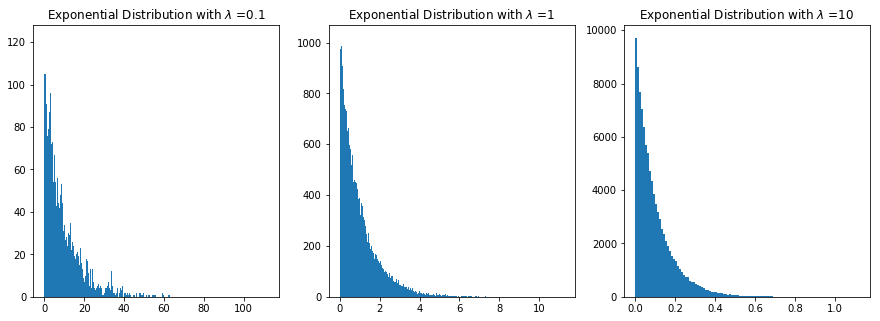

In [3]:
plt.figure(figsize=(15, 5))
for i, lamb in enumerate(parameters):
    samples = -(1/lamb) * np.log(1 - uniform)
    plt.subplot(1, 3, i+1)
    plt.title('Exponential Distribution with $\lambda$ =' + str(lamb))
    plt.hist(samples, bins = np.arange(min(samples), max(samples), 0.01))

### Problem 2 (Gamma distribution)

In [4]:
# Put your code here 
betas = [0.1, 1, 10]

In [5]:
def getExponential(beta, x):
    X = -beta * np.log(1 - x)
    return X

In [6]:
def getGamma(k, beta):
    gamma = 0
    for i in range(k):
        uniform = np.random.uniform(0,1,100000)
        X = getExponential(beta, uniform)
        gamma += X
    return gamma

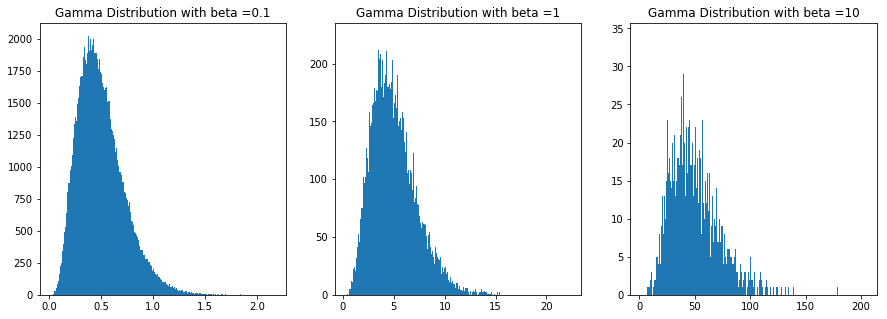

In [7]:
plt.figure(figsize=(15, 5))
for i, beta in enumerate(betas):
    samples = getGamma(5, beta)
    plt.subplot(1, 3, i+1)
    plt.title('Gamma Distribution with beta =' + str(beta))
    plt.hist(samples, bins = np.arange(min(samples), max(samples), 0.01))

### Problem 3 (Beta distribution)

In [8]:
# Put your code here 
alpha_1s = [5, 10]
alpha_2s = [16, 11]

In [9]:
def getBeta(alpha1, alpha2, sample_size):
    n = alpha1 + alpha2 - 1
    k = alpha1
    data = np.zeros((n, sample_size))
    for i in range(n):
        data[i, :] = np.random.uniform(0,1,sample_size)
    data = np.sort(data, axis = 0) # Order statistics, exactly k-1 of the others < x
    return data[k, :]

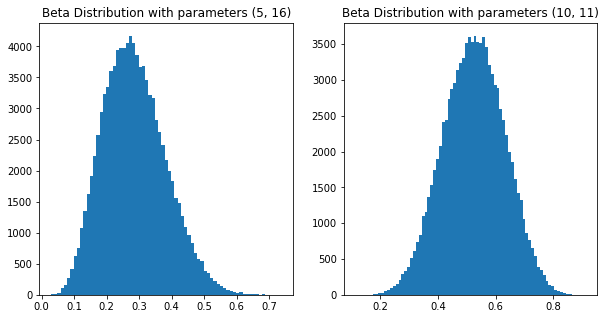

In [10]:
plt.figure(figsize=(10, 5))
for (i,alpha_1), alpha_2 in zip(enumerate(alpha_1s), alpha_2s):
    samples = getBeta(alpha_1, alpha_2, 100000)
    plt.subplot(1, 2, i+1)
    plt.title('Beta Distribution with parameters (%d, %d)' % (alpha_1, alpha_2))
    plt.hist(samples, bins = np.arange(min(samples), max(samples), 0.01))

### Problem 4 (Dirichlet distribution)

### 1. Gamma

In [11]:
# Put your code here 
def getDirichlet(N, alpha, sample_size):
    data = np.zeros((N, sample_size))
    for i in range(N):
        data[i,:] = getGamma(alpha, 1/10)
    data_sum = np.sum(data, axis = 0)
    data_dirich = data/data_sum
    return data_dirich

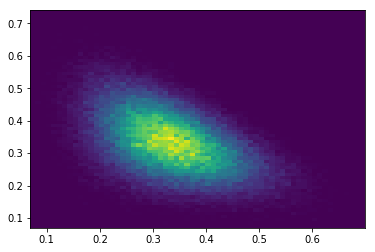

In [12]:
data_dirich = getDirichlet(3, 10, 100000)
plt.hist2d(data_dirich[0,:], data_dirich[1,:], bins=[np.arange(min(data_dirich[0,:]), max(data_dirich[0,:]), 0.01),\
                                                   np.arange(min(data_dirich[1,:]), max(data_dirich[1,:]), 0.01)] )
pass

### 2. Stick method

In [13]:
def stick_breaking(alpha1, k, sample_size):
    final_beta = np.zeros((k, sample_size))
    
    alpha2 = 2 * alpha1
    betas_1 = getBeta(alpha1, alpha2, sample_size)
    final_beta[0,:] = betas_1
    
    alpha2 =  alpha1
    betas_2 = getBeta(alpha1, alpha2, sample_size)    
    remaining_pieces = 1 - betas_1
    p = betas_2 * remaining_pieces
    final_beta[1,:] = p
       
    remaining_pieces = (1 - betas_1) * (1 - betas_2)
    p = remaining_pieces
    final_beta[2,:] = p
    
    return final_beta

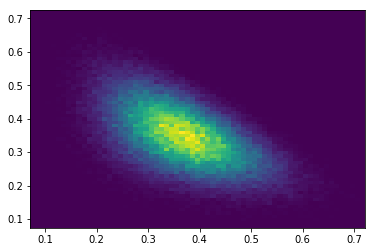

In [14]:
final_beta = stick_breaking(10, 3, 100000)
plt.hist2d(final_beta[0,:], final_beta[1,:], bins=[np.arange(min(final_beta[0,:]), max(final_beta[0,:]), 0.01),\
                                                   np.arange(min(final_beta[1,:]), max(final_beta[1,:]), 0.01)] )
pass